### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

### Dataset preparation

In [3]:
df = pd.read_csv('datasets/Tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df = df[['airline_sentiment', 'text']]

In [6]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


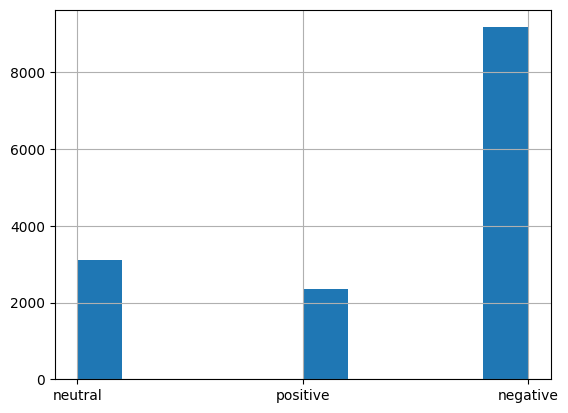

In [7]:
df['airline_sentiment'].hist();

In [8]:
df = df[df['airline_sentiment']!='neutral'].copy()

In [9]:
target_map = {'positive':1, 'negative':0}
df['target'] = df['airline_sentiment'].map(target_map)

In [10]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


### Preparing train and test data

In [11]:
X = df['text']
y = df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [13]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [14]:
# data must not be sparse matrix before passing into tensorflow
X_train = X_train.toarray()
X_test = X_test.toarray()

In [15]:
X_train.shape

(9232, 2000)

In [16]:
# input dimensions
D = X_train.shape[1]

### Build Model

In [17]:
i = Input(shape=(D,))
x = Dense(1)(i) #Sigmoid included in loss

model = Model(i, x)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

In [20]:
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = 50,
    batch_size=32
)

Epoch 1/50


289/289 [==============================] - 2s 5ms/step - loss: 0.5965 - accuracy: 0.7953 - val_loss: 0.5229 - val_accuracy: 0.7951
Epoch 2/50
289/289 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.7953 - val_loss: 0.4557 - val_accuracy: 0.7951
Epoch 3/50
289/289 [==============================] - 1s 3ms/step - loss: 0.4359 - accuracy: 0.7953 - val_loss: 0.4231 - val_accuracy: 0.7951
Epoch 4/50
289/289 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.7953 - val_loss: 0.4015 - val_accuracy: 0.7960
Epoch 5/50
289/289 [==============================] - 1s 3ms/step - loss: 0.3863 - accuracy: 0.7969 - val_loss: 0.3839 - val_accuracy: 0.8012
Epoch 6/50
289/289 [==============================] - 1s 3ms/step - loss: 0.3680 - accuracy: 0.8015 - val_loss: 0.3686 - val_accuracy: 0.8042
Epoch 7/50
289/289 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.8057 - val_loss: 0.3549 - val_accuracy: 0.8064
Epoc

### Ploting he loss and accuracy

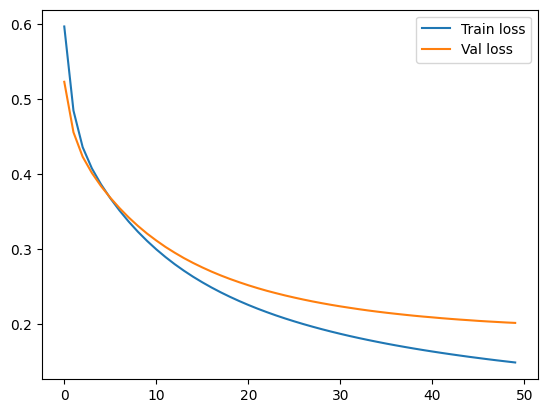

In [21]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Val loss')
plt.legend();

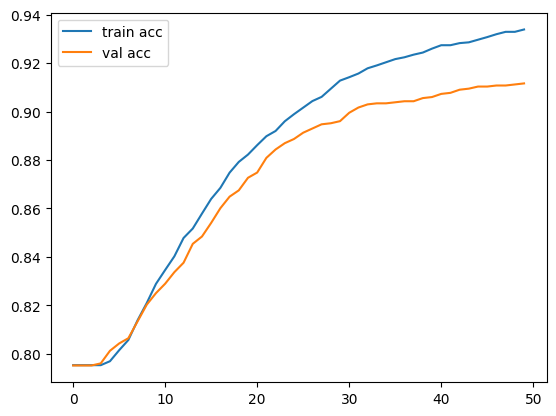

In [22]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [23]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()

73/73 [==============================] - 0s 2ms/step


In [24]:
cm = confusion_matrix(y_train, P_train, normalize='true')
cm

array([[0.98774176, 0.01225824],
       [0.18941799, 0.81058201]])

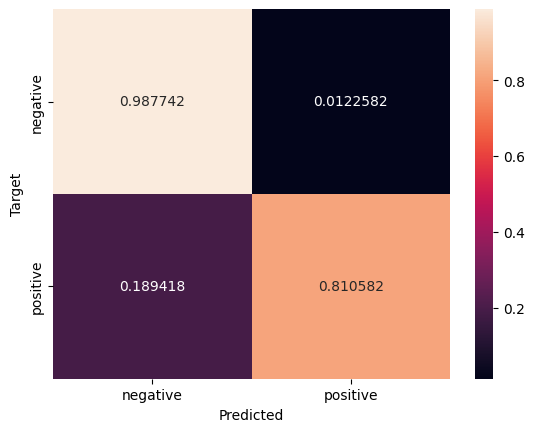

In [25]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

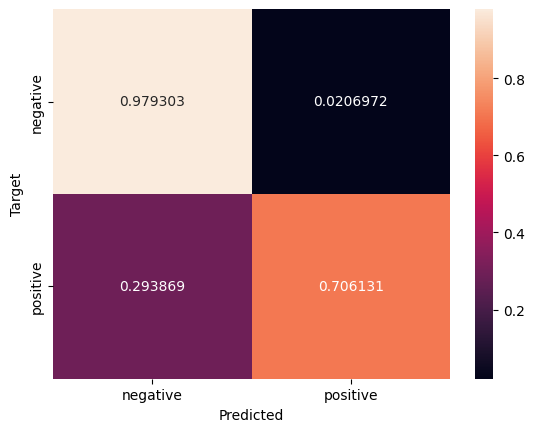

In [26]:
cm_test = confusion_matrix(y_test, P_test, normalize='true')
plot_cm(cm_test)

In [27]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print("Train AUC:", roc_auc_score(y_train, Pr_train))
print("Test AUC:", roc_auc_score(y_test, Pr_test))

73/73 [==============================] - 0s 2ms/step
Train AUC: 0.9864655623440696
Test AUC: 0.9594497183416473


In [28]:
print("Train F1:", f1_score(y_train, P_train))
print("Test F1:", f1_score(y_test, P_test))

Train F1: 0.8724373576309795
Test F1: 0.7905325443786982


### Checking the most influencial words

In [29]:
model.layers

In [30]:
model.layers[1].get_weights()

[array([[-1.7449939 ],
        [ 0.91969925],
        [-1.1588639 ],
        ...,
        [-0.05534271],
        [-2.8248777 ],
        [ 0.18013828]], dtype=float32),
 array([-0.23082891], dtype=float32)]

In [31]:
w = model.layers[1].get_weights()[0]

In [32]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'jetblue': 966,
 'my': 1184,
 'family': 672,
 'and': 150,
 'are': 178,
 'excited': 637,
 'to': 1767,
 'see': 1538,
 'you': 1993,
 'too': 1774,
 'usairways': 1867,
 'never': 1196,
 'it': 957,
 'would': 1974,
 'be': 238,
 'so': 1611,
 'hard': 845,
 'spend': 1636,
 'money': 1165,
 'through': 1751,
 'us': 1865,
 'air': 118,
 'hoping': 889,
 'someone': 1618,
 'will': 1943,
 'come': 391,
 'back': 221,
 'the': 1732,
 'phone': 1315,
 'united': 1849,
 'is': 952,
 'truly': 1808,
 'drunk': 582,
 'of': 1231,
 'boarding': 269,
 'don': 566,
 'believe': 248,
 'gate': 790,
 'agent': 113,
 'that': 1730,
 'overhead': 1277,
 'full': 778,
 'http': 904,
 'co': 384,
 'if': 917,
 'there': 1736,
 'error': 618,
 'why': 1940,
 'do': 558,
 'send': 1545,
 'out': 1270,
 'flight': 720,
 'tickets': 1758,
 'americanair': 145,
 'far': 675,
 'all': 128,
 'am': 141,
 'getting': 797,
 'maybe': 1107,
 'your': 1995,
 'bag': 226,
 'today': 1768,
 'we': 1913,
 'know': 988,
 'website': 1916,
 'says': 1522,
 'status': 1655,
 

In [33]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most positive words:
thanks 6.83947
thank 6.7406497
great 5.234898
awesome 4.3771276
amazing 4.257477
love 4.24452
best 3.676037
excellent 3.392396
good 3.1356375
wonderful 3.1246548


In [34]:
print("Most negative words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight < -threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most negative words:
worst -6.13903
hours -5.222135
not -5.0155964
rude -4.862094
hold -4.8284187
stuck -4.6000266
disappointed -4.53344
fail -4.5048347
no -4.358558
rebook -4.171965
